In [1]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing


from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# 2. Load the dataset



df = pd.read_csv(r"D:\data science\Assignments\assignment pnyb\exchange_rate.csv", parse_dates=[0])
df.columns = ['Date', 'USD_AUD']
df.set_index('Date', inplace=True)


print(df.head())
print(df.info())

                  USD_AUD
Date                     
01-01-1990 00:00   0.7855
02-01-1990 00:00   0.7818
03-01-1990 00:00   0.7867
04-01-1990 00:00   0.7860
05-01-1990 00:00   0.7849
<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   USD_AUD  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB
None


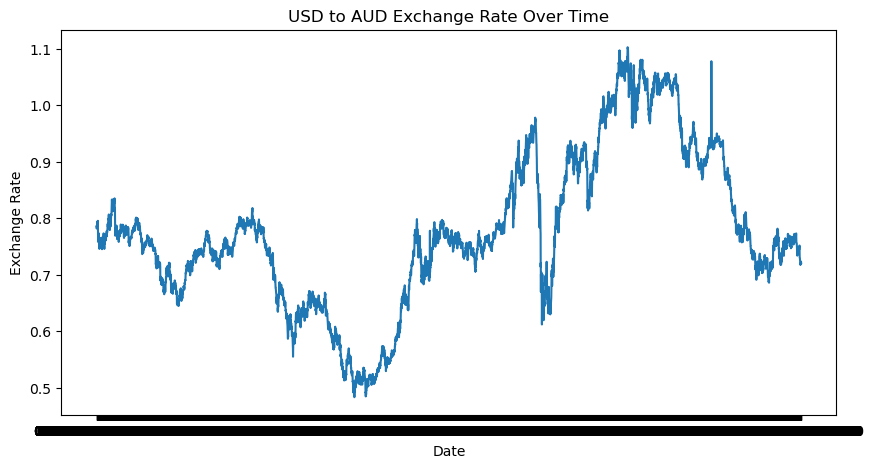

In [4]:
# 3. Initial Exploration



plt.figure(figsize=(10, 5))
plt.plot(df['USD_AUD'])
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.show()

In [10]:
# 4. Data Preprocessing



# Check missing values
print("Missing values:\n", df.isnull().sum())


# Forward fill missing values (if any)
df['USD_AUD'] = df['USD_AUD'].fillna(method='ffill')

# Stationarity Check using ADF Test



def adf_test(series):
 result = adfuller(series)
 print("ADF Statistic:", result[0])
 print("p-value:", result[1])


adf_test(df['USD_AUD'])


# If non-stationary, difference the data
df['USD_AUD_diff'] = df['USD_AUD'].diff().dropna()

Missing values:
 USD_AUD    0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12124\2727774749.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['USD_AUD'] = df['USD_AUD'].fillna(method='ffill')


ADF Statistic: -1.664994180738073
p-value: 0.44923273535983155


<Figure size 1000x400 with 0 Axes>

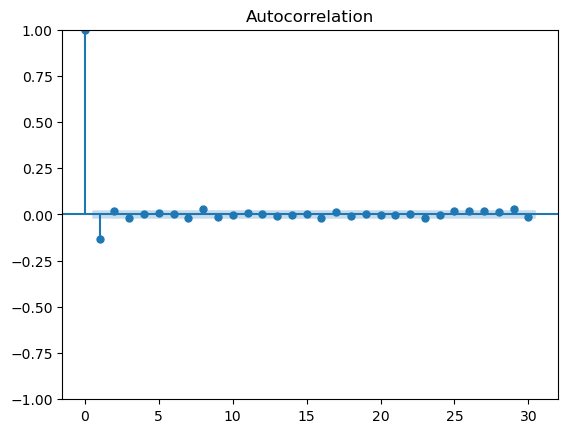

<Figure size 1000x400 with 0 Axes>

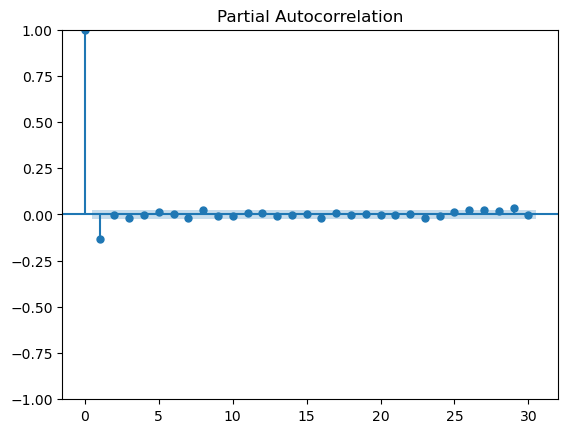

In [11]:
# Part 2: ARIMA Model



# 1. ACF & PACF Plots


plt.figure(figsize=(10,4))
plot_acf(df['USD_AUD_diff'].dropna(), lags=30)
plt.show()


plt.figure(figsize=(10,4))
plot_pacf(df['USD_AUD_diff'].dropna(), lags=30)
plt.show()

In [14]:
# 2. Train-Test Split



train_size = int(len(df) * 0.8)
train, test = df['USD_AUD'][:train_size], df['USD_AUD'][train_size:]

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                USD_AUD   No. Observations:                 6070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22719.046
Date:                Sat, 13 Dec 2025   AIC                         -45432.092
Time:                        09:30:48   BIC                         -45411.959
Sample:                             0   HQIC                        -45425.104
                               - 6070                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5972      0.062     -9.648      0.000      -0.719      -0.476
ma.L1          0.5398      0.064      8.430      0.000       0.414       0.665
sigma2      3.281e-05   1.95e-07    168.198      0.0

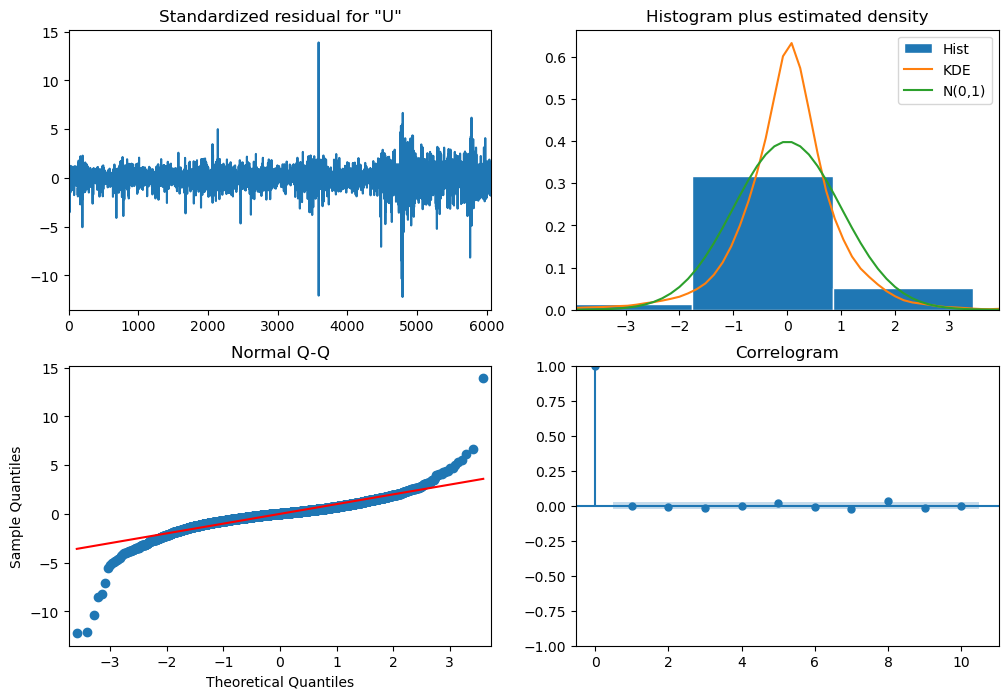

In [15]:
# 3. Fit ARIMA Model
# (p=1, d=1, q=1 chosen based on ACF/PACF)

arima_model = ARIMA(train, order=(1,1,1))
arima_result = arima_model.fit()
print(arima_result.summary())

# 4. Diagnostics

arima_result.plot_diagnostics(figsize=(12,8))
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


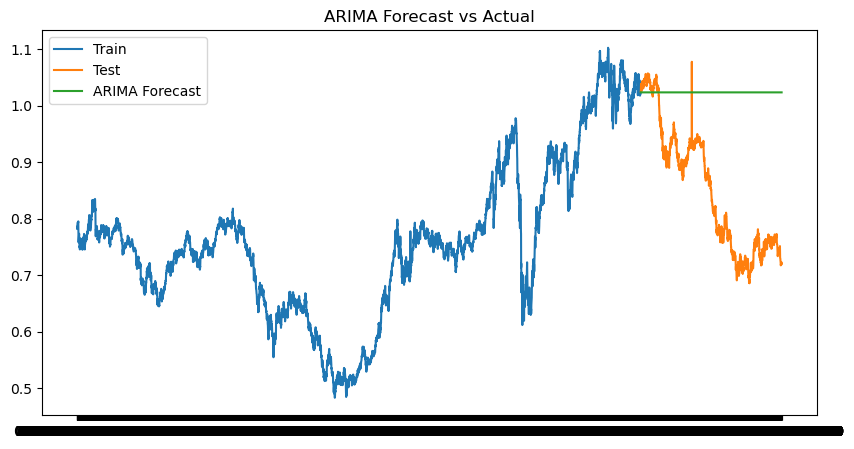

In [18]:
# 5. Forecasting



arima_forecast = arima_result.forecast(steps=len(test))


plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


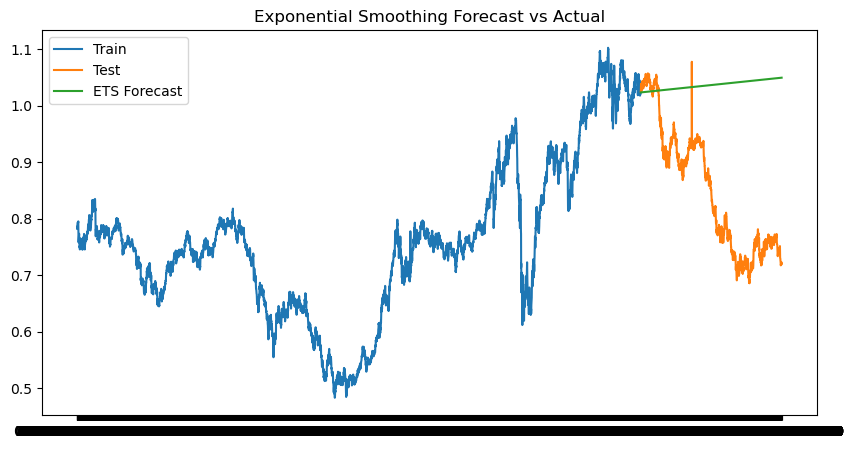

In [20]:
# Part 3: Exponential Smoothing Model



ets_model = ExponentialSmoothing(train, trend='add', seasonal=None)
ets_fit = ets_model.fit()


ets_forecast = ets_fit.forecast(len(test))


plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ets_forecast, label='ETS Forecast')
plt.legend()
plt.title("Exponential Smoothing Forecast vs Actual")
plt.show()

In [28]:
# Part 4: Evaluation & Comparison
# -------------------------------


def evaluate(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    print(f"{model_name} MAE: {mae:.4f}")
    print(f"{model_name} RMSE: {rmse:.4f}")
    print(f"{model_name} MAPE: {mape:.2f}%\n")




print("Model Evaluation Results:\n")
evaluate(test, arima_forecast, "ARIMA")
evaluate(test, ets_forecast, "Exponential Smoothing")

Model Evaluation Results:

ARIMA MAE: 0.1777
ARIMA RMSE: 0.2054
ARIMA MAPE: nan%

Exponential Smoothing MAE: 0.1903
Exponential Smoothing RMSE: 0.2201
Exponential Smoothing MAPE: nan%

